In [1]:
!conda info -e

# conda environments:
#
                         /Users/canaguier/anaconda/envs/tf_sessions
                         /Users/canaguier/anaconda3
                         /Users/canaguier/miniconda3/envs/myenv
base                     /anaconda3
py36                  *  /anaconda3/envs/py36
py37                     /anaconda3/envs/py37
pyexp                    /anaconda3/envs/pyexp



In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('dark_background')
from math import factorial as fact
from scipy.special import jv
from scipy.special import lpmv

import pytest

import importlib
import collective_Smatrix as tools
import platonic_solid as positions

In [2]:
x = np.linspace(0, 0.2, 3)
l = 2
for m in range(l+1):
    print(np.round(lpmv(m, 2, x), 4))

[-0.5   -0.485 -0.44 ]
[ 0.     -0.2985 -0.5879]
[3.   2.97 2.88]


In [3]:
x = 0.1
z = np.zeros(l+1)
for m in range(l+1):
    z[m] = lpmv(m,l,x)
print(z)

[-0.485      -0.29849623  2.97      ]


In [4]:
importlib.reload(tools)
u_rho = tools.eval_u1(2*2, [1, 1, 1])
print(u_rho)

[ 0.        +0.j          0.        +0.j          0.        +0.j
  0.        +0.j          0.16075457+0.j          0.        +0.j
  0.        +0.j          0.        +0.j          0.        +0.j
  0.        +0.j          0.        +0.j          0.        +0.j
  0.08411823-0.08411823j  0.11896113+0.j         -0.08411823-0.08411823j
  0.        +0.j          0.        +0.j          0.        +0.j
  0.        +0.j          0.        +0.j          0.        -0.0413459j
  0.0413459 -0.0413459j   0.        +0.j         -0.0413459 -0.0413459j
  0.        +0.0413459j   0.        +0.j          0.        +0.j
  0.        +0.j         -0.00670952-0.00670952j  0.        -0.0164349j
  0.00519717-0.00519717j -0.01200236+0.j         -0.00519717-0.00519717j
  0.        +0.0164349j   0.00670952-0.00670952j  0.        +0.j
 -0.00163198-0.j         -0.00230797-0.00230797j  0.        -0.00246732j
 -0.00087233+0.00087233j -0.00273082+0.j          0.00087233+0.00087233j
  0.        +0.00246732j  0.00230797-

In [5]:
alpha = np.arange(2+2+1)
lmax = 2
m1, m2 = 1, 1
ind = alpha*(4*lmax+1)+m2-m1+2*lmax
print(ind)

[ 4 13 22 31 40]


In [6]:
u = u_rho[ind]
print(u)

[ 0.16075457+0.j  0.11896113+0.j  0.        +0.j -0.01200236+0.j
 -0.00273082+0.j]


In [7]:
importlib.reload(tools)
l1, l2 = 2, 2
m1, m2 = 1, 1
print(tools.CG_coeff(l1, m1, l2, m2))

[ 0.          0.         -0.65465367  0.          0.75592895  0.        ]


In [8]:
importlib.reload(tools)
l1, l2 = 2, 2
m1, m2 = -1, -1
print(tools.a_coeff(l1, m1, l2, m2))

[ 0.         -0.          0.27033563  0.          0.25487487]


In [9]:
importlib.reload(tools)
pos = [1, 1, 1]
lmax = 2

u1 = tools.eval_u1(lmax, pos)
print(u1.shape, u1)

(15,) [ 0.        +0.j          0.        +0.j          0.16075457+0.j
  0.        +0.j          0.        +0.j          0.        +0.j
  0.08411823-0.08411823j  0.11896113+0.j         -0.08411823-0.08411823j
  0.        +0.j          0.        -0.0413459j   0.0413459 -0.0413459j
  0.        +0.j         -0.0413459 -0.0413459j   0.        +0.0413459j ]


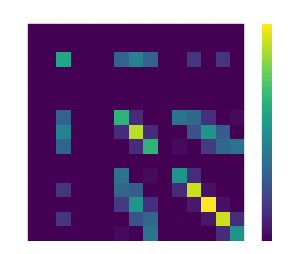

In [10]:
importlib.reload(tools)
rho = [1, 1, 1]
lmax = 2
A = tools.Arho_matrix(rho, lmax)
fig, ax = plt.subplots()
pos = ax.matshow(np.abs(np.real(A)), vmin=0)
fig.colorbar(pos)
plt.show()

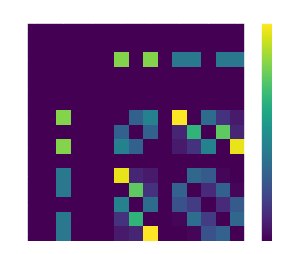

In [11]:
fig, ax = plt.subplots()
pos = ax.matshow(np.abs(np.imag(A)), vmin=0)
fig.colorbar(pos)
plt.show()

In [12]:
importlib.reload(tools)
rho = [1, 1, 1]
lmax = 2
C = tools.Crho_matrix(rho, lmax)
print(C.shape)

(10, 10)


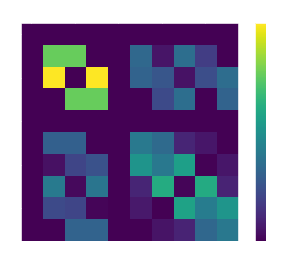

In [13]:
fig, ax = plt.subplots()
pos = ax.matshow(np.abs(np.abs(C)), vmin=0)
fig.colorbar(pos)
plt.show()

In [14]:
importlib.reload(tools)
rho = [1, 1, 1]
lmax = 2
B = tools.Brho_matrix(rho, lmax)
print(B.shape)

(10, 10)


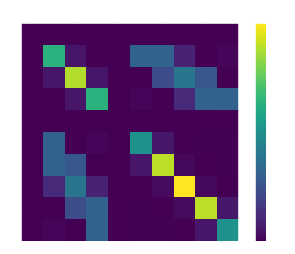

In [15]:
fig, ax = plt.subplots()
pos = ax.matshow(np.abs(np.real(B)), vmin=0)
fig.colorbar(pos)
plt.show()

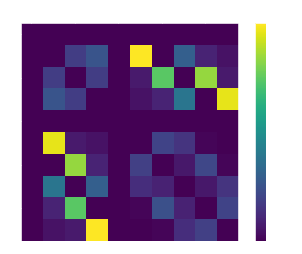

In [16]:
fig, ax = plt.subplots()
pos = ax.matshow(np.abs(np.imag(B)), vmin=0)
fig.colorbar(pos)
plt.show()

In [17]:
importlib.reload(tools)
rho = [1, 1, 1]
lmax = 2
T = tools.translate_reduced(rho, lmax)
print(T.shape)

(20, 20)


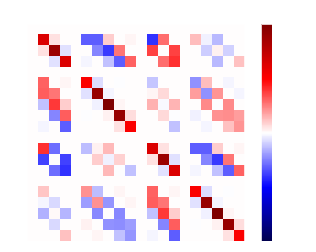

In [18]:
fig, ax = plt.subplots()
v = np.max(np.abs(T))
pos = ax.matshow(np.real(T), cmap='seismic', vmin=-v, vmax=v)
fig.colorbar(pos)
plt.show()

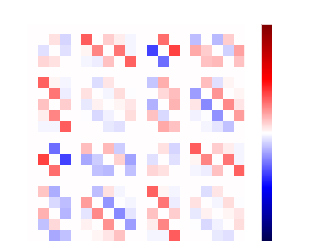

In [19]:
fig, ax = plt.subplots()
v = np.max(np.abs(T))
pos = ax.matshow(np.imag(T), cmap='seismic', vmin=-v, vmax=v)
fig.colorbar(pos)
plt.show()

In [21]:
u = np.linspace(0,1,5)
print(u)

[0.   0.25 0.5  0.75 1.  ]


In [20]:
importlib.reload(tools)
pos1 = np.array([0, 0, 0])
pos2 = np.array([1, 1, 0])
R = np.linalg.norm(pos1-pos2)
print(R)
G = tools.eval_green(pos1, pos2)
print(G.shape)

1.4142135623730951
(3, 3)


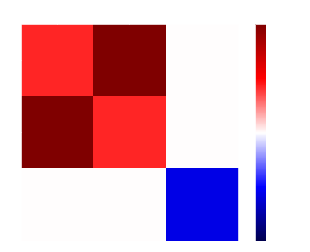

In [21]:
fig, ax = plt.subplots()
v = np.max(np.abs(G))
pos = ax.matshow(np.real(G), cmap='seismic', vmin=-v, vmax=v)
fig.colorbar(pos)
plt.show()

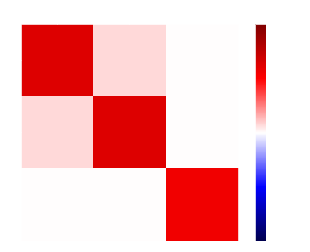

In [22]:
fig, ax = plt.subplots()
v = np.max(np.abs(G))
pos = ax.matshow(np.imag(G), cmap='seismic', vmin=-v, vmax=v)
fig.colorbar(pos)
plt.show()

In [23]:
importlib.reload(tools)
pos1 = np.array([[1, 1, -1]])
pos2 = np.array([[1, 1, 1]])
pos = np.concatenate((pos1.T, pos2.T), axis=1)
eps = 1.33**2
alpha = (eps-1)/(eps+2)*np.ones(2)
lmax = 2
print(pos.shape, alpha.shape)
TQ = tools.matrix_TQdip(pos, alpha, lmax)
print(TQ.shape)

(3, 2) (2,)
(20, 6)


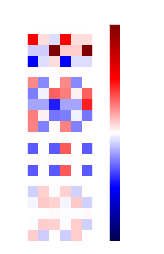

In [24]:
fig, ax = plt.subplots()
v = np.max(np.abs(TQ))
out = ax.matshow(np.real(TQ), cmap='seismic', vmin=-v, vmax=v)
fig.colorbar(out)
plt.show()

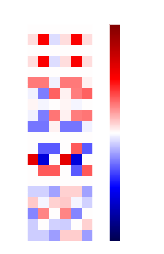

In [25]:
fig, ax = plt.subplots()
v = np.max(np.abs(TQ))
out = ax.matshow(np.imag(TQ), cmap='seismic', vmin=-v, vmax=v)
fig.colorbar(out)
plt.show()

In [26]:
importlib.reload(tools)
pos1 = np.array([[1, 1, -1]])
pos2 = np.array([[1, 1, 1]])
pos = np.concatenate((pos1.T, pos2.T), axis=1)

lmax = 2
print(pos.shape, alpha.shape)
TQ = tools.matrix_TQdip(pos, alpha, lmax)
print(TQ.shape)

(3, 2) (2,)
(20, 6)


In [27]:
importlib.reload(tools)
pos1 = np.array([[0, 0, -1]])
pos2 = np.array([[0, 0, 1]])
pos = np.concatenate((pos1.T, pos2.T), axis=1)
eps = 1.33**2
alpha = (eps-1)/(eps+2)*np.ones(2)
lmax = 2
print(pos.shape, alpha.shape)
FT = tools.matrix_FTdip(pos, alpha, lmax)
print(FT.shape)

(3, 2) (2,)
(6, 20)


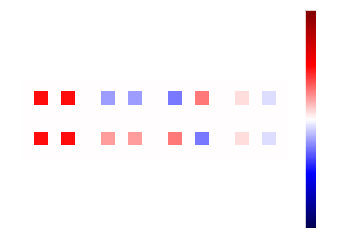

In [28]:
fig, ax = plt.subplots()
v = np.max(np.abs(FT))
out = ax.matshow(np.real(FT), cmap='seismic', vmin=-v, vmax=v)
fig.colorbar(out)
plt.show()

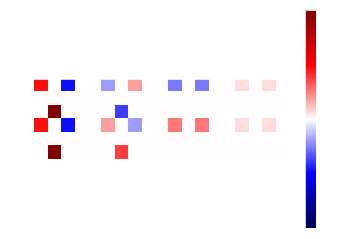

In [29]:
fig, ax = plt.subplots()
v = np.max(np.abs(FT))
out = ax.matshow(np.imag(FT), cmap='seismic', vmin=-v, vmax=v)
fig.colorbar(out)
plt.show()

In [14]:
def showmat(A, part='abs'):
    fig, ax = plt.subplots()
    v = np.max(np.abs(A))
    if part=='abs':
        out = ax.matshow(np.abs(A), cmap='seismic', vmin=-v, vmax=v)
    elif part=='real':
        out = ax.matshow(np.real(A), cmap='seismic', vmin=-v, vmax=v)
    elif part=="imag":
        out = ax.matshow(np.imag(A), cmap='seismic', vmin=-v, vmax=v)
    else:
        print("Wrong part description")
    fig.colorbar(out)
    plt.show()

## Tests with only one scatterer

In [95]:
lmax = 10
Nsph = 2*lmax*(2*lmax+1)
pos = np.reshape(np.array([0, 0, 0]), (3, -1))
eps = (np.sqrt(10) + 0.1*1j)**2
alpha_0 = np.array([(eps-1)/(eps+2)])
alpha = alpha_0 / (1-1j*alpha_0/(6*np.pi))
print(np.imag(alpha), np.abs(alpha)**2/(6*np.pi), np.imag(alpha)-np.abs(alpha)**2/(6*np.pi))

[0.04292293] [0.02980054] [0.01312239]


In [99]:
importlib.reload(tools)
print(pos.shape, alpha.shape)
print("alpha:", alpha[0])
D = tools.matrix_Ddip(pos, alpha, lmax)
print(D[9:12, 9:12])

(3, 1) (1,)
alpha: (0.7482543279764764+0.04292292926118836j)
[[-0.00227713+0.03969612j  0.        +0.j          0.        +0.j        ]
 [ 0.        +0.j         -0.00227713+0.03969612j  0.        +0.j        ]
 [ 0.        +0.j          0.        +0.j         -0.00227713+0.03969612j]]


In [97]:
print(1j*alpha[0]/(6*np.pi))

(-0.002277132121300628+0.039696124995786834j)


In [100]:
D_manual = np.zeros((Nsph, Nsph),  dtype=np.complex_)
v = 1j*alpha[0]/(6*np.pi)
D_manual[lmax-1, lmax-1] = v
D_manual[lmax, lmax] = v
D_manual[lmax+1, lmax+1] = v
print(D_manual[9:12,9:12])

[[-0.00227713+0.03969612j  0.        +0.j          0.        +0.j        ]
 [ 0.        +0.j         -0.00227713+0.03969612j  0.        +0.j        ]
 [ 0.        +0.j          0.        +0.j         -0.00227713+0.03969612j]]


In [102]:
np.linalg.norm(D-D_manual)/np.linalg.norm(D_manual)

1.7485390332116302e-16

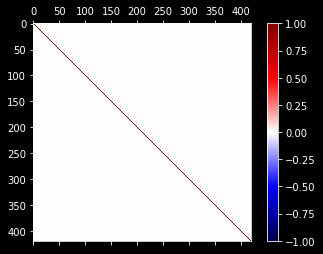

In [89]:
S = tools.matrix_Sdip(pos, alpha, lmax)
showmat(np.dot(S.conj().T,S), 'real')

In [90]:
S_manual = np.eye(Nsph) + 2*D_manual
A_manual = np.eye(Nsph)-np.dot(S_manual.conj().T, S_manual)

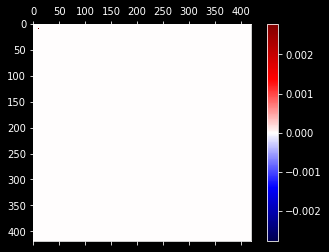

In [91]:
A = np.identity(Nsph)-np.dot(S.conj().T, S)
showmat(A, 'abs')

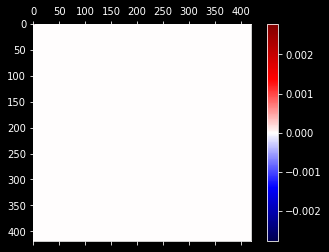

In [92]:
showmat(A_manual, 'real')

In [93]:
U, Sigma, V = np.linalg.svd(S)
print(np.mean(1-Sigma*Sigma), 1-Sigma*Sigma)

1.98904128834768e-05 [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0

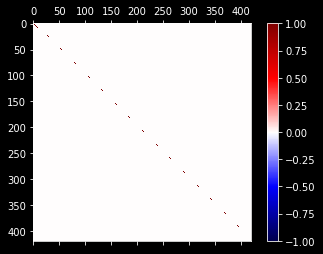

In [94]:
showmat(V)

## Tests with two scatterers

In [86]:
importlib.reload(tools)
pos1 = np.array([[1, 0, 0]])
pos2 = np.array([[0, 1, 0]])
pos = np.concatenate((pos1.T, pos2.T), axis=1)
eps = 1.33**2
alpha_0 = (eps-1)/(eps+2)*np.ones(2)
alpha = alpha_0 / (1-1j*alpha_0/(6*np.pi))
print(np.imag(alpha), np.abs(alpha)**2/(6*np.pi), np.imag(alpha)-np.abs(alpha)**2/(6*np.pi))
print(pos.shape, alpha.shape)
X = tools.matrix_Xdip(pos, alpha)
print(X.shape)

[0.00220779 0.00220779] [0.00220779 0.00220779] [0. 0.]
(3, 2) (2,)
(6, 6)


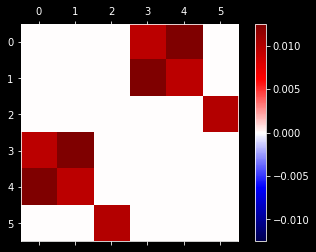

In [87]:
showmat(X)

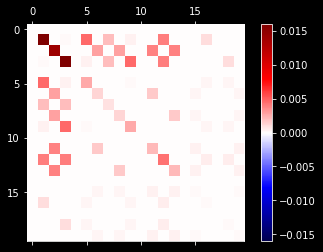

In [88]:
D = tools.matrix_Ddip(pos, alpha, lmax)
showmat(D)

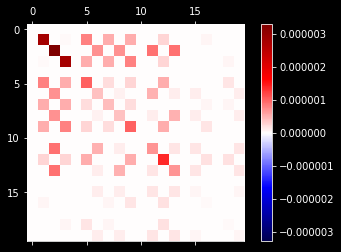

In [89]:
S = tools.matrix_Sdip(pos, alpha, lmax)
A = np.identity(Nsph)-np.dot(S.conj().T, S)
showmat(A)

In [90]:
U, Sigma, V = np.linalg.svd(S)
print(np.mean(Sigma), Sigma)

0.9999996230947371 [1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         0.99999951 0.99999928 0.99999902 0.9999985
 0.9999982  0.99999795]


## Test translations 

In [74]:
lmax = 4
rho = np.random.uniform(0.1, 0.5, 3).reshape(3,1)
T1 = tools.translate_reduced(rho, lmax)
T2 = tools.translate_reduced(-rho, lmax)
print(T1.shape, T2.shape)

(72, 72) (72, 72)


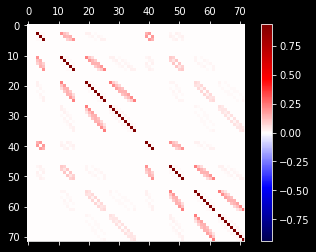

In [75]:
style.use('dark_background')
showmat(T1)

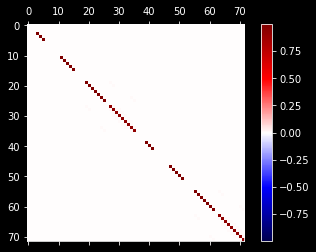

In [76]:
showmat(np.dot(T1, T2))

In [77]:
def compact_matrix(M, lmax):
    '''
    function that takes a 2*lmax*(2*lmax+1) matrix
    and extracts elements with |m|<l
    '''
    n = lmax*(2*lmax+1)
    Nsph = 2*n
    if Nsph != M.shape[0]:
        print("incompatible")
        pass

    inds = []
    for l in range(1, lmax+1):
        for m in range(-l, l+1):
            ind = (l-1)*(2*lmax+1) + lmax + m
            inds.append(ind)
            inds.append(n+ind)
    inds.sort()
    return M[:,inds][inds,:]

In [78]:
CT1 = compact_matrix(T1, lmax)
CT2 = compact_matrix(T2, lmax)

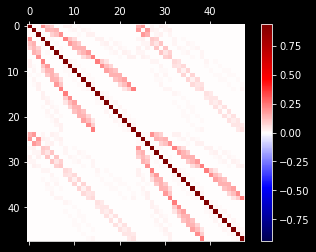

In [79]:
style.use('dark_background')
showmat(CT1)

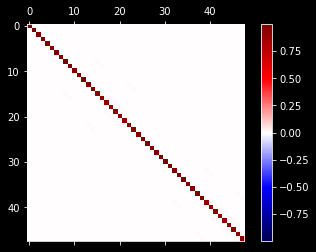

In [80]:
showmat(np.dot(CT1, CT2))

In [84]:
print(np.linalg.norm(np.identity(CT1.shape[0])-np.dot(CT1, CT2))/np.linalg.norm(T1))
print(np.linalg.norm(np.identity(CT1.shape[0])-compact_matrix(np.dot(T1, T2), lmax))/np.linalg.norm(CT1))

0.04364315760939264
0.04364315760939265


## Test CG coefficients

In [80]:
print(-1/np.sqrt(3), 0, np.sqrt(2/3))
tools.CG_coeff(1, 0, 1, 0)

-0.5773502691896258 0 0.816496580927726


array([-0.57735027,  0.        ,  0.81649658,  0.        ])

In [79]:
print(np.sqrt(1/3), np.sqrt(1/2), np.sqrt(1/6))
tools.CG_coeff(1, 1, 1, -1)

0.5773502691896257 0.7071067811865476 0.408248290463863


array([0.57735027, 0.70710678, 0.40824829, 0.        ])

In [68]:
print(np.sqrt(1/3), -np.sqrt(1/2), np.sqrt(1/6))
tools.CG_coeff(1, -1, 1, 1)

0.5773502691896257 -0.7071067811865476 0.408248290463863


array([ 0.51247201, -0.70710678,  0.40824829,  0.        ])

In [78]:
print(0, -np.sqrt(2/5), 0, np.sqrt(3/5))
tools.CG_coeff(2, 0, 1, 0)

0 -0.6324555320336759 0 0.7745966692414834


array([ 0.        , -0.63245553,  0.        ,  0.77459667,  0.        ])

In [77]:
print(0, 0, -np.sqrt(1/3), np.sqrt(2/3))
tools.CG_coeff(2, 1, 1, 1)

0 0 -0.5773502691896257 0.816496580927726


array([ 0.        ,  0.        , -0.57735027,  0.81649658,  0.        ])

In [76]:
print(0, 0, np.sqrt(2/3), np.sqrt(1/3))
tools.CG_coeff(2, 2, 1, 0)

0 0 0.816496580927726 0.5773502691896257


array([0.        , 0.        , 0.81649658, 0.57735027, 0.        ])

In [75]:
importlib.reload(tools)
print(np.sqrt(1/5), 0, -np.sqrt(2/7), 0, np.sqrt(18/35))
tools.CG_coeff(2, 0, 2, 0)

0.4472135954999579 0 -0.5345224838248488 0 0.7171371656006361


array([ 0.4472136 , -0.        , -0.53452248,  0.        ,  0.71713717,
        0.        ])

## Test Platonic solids - Distance between origin and vertices

In [7]:
import numpy as np
import platonic_solid as positions
from numpy.linalg import norm

In [8]:
norm(np.array([0,1,1]))

1.4142135623730951

In [31]:
import importlib
importlib.reload(positions)

<module 'platonic_solid' from '/Users/canaguier/Desktop/LKB/multiple_scattering/platonic_solid.py'>

In [43]:
ka = np.random.uniform(1,5)
# tetrahedron (Nring=4)
N = 4 + 1
pos = np.zeros((3,N))
pos[:, :-1] = positions.platonic(N-1, ka)
#print(pos)
for i in range(N-1):
    print(np.linalg.norm(pos[:,i]-pos[:,-1])/ka)

1.0000000000000002
1.0000000000000002
1.0000000000000002
1.0000000000000002


In [44]:
# octahedron (Nring=6)
N = 6 + 1
pos = np.zeros((3,N))
pos[:, :-1] = positions.platonic(N-1, ka)
#print(pos)
for i in range(N-1):
    print(np.linalg.norm(pos[:,i]-pos[:,-1])/ka)

1.0
1.0
1.0
1.0
1.0
1.0


In [45]:
# cube (Nring=8)
N = 8 + 1
pos = np.zeros((3,N))
pos[:, :-1] = positions.platonic(N-1, ka)
#print(pos)
for i in range(N-1):
    print(np.linalg.norm(pos[:,i]-pos[:,-1])/ka)

1.0000000000000002
1.0000000000000002
1.0000000000000002
1.0000000000000002
1.0000000000000002
1.0000000000000002
1.0000000000000002
1.0000000000000002


In [46]:
# icosahedron (Nring=12)
N = 12 + 1
pos = np.zeros((3,N))
pos[:, :-1] = positions.platonic(N-1, ka)
#print(pos)
for i in range(N-1):
    print(np.linalg.norm(pos[:,i]-pos[:,-1])/ka)

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


In [47]:
# dodecahedron (Nring=20)
N = 20 + 1
pos = np.zeros((3,N))
pos[:, :-1] = positions.platonic(N-1, ka)
#print(pos)
for i in range(N-1):
    print(np.linalg.norm(pos[:,i]-pos[:,-1])/ka)

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0000000000000002
1.0000000000000002
1.0000000000000002
1.0000000000000002
1.0000000000000002
1.0000000000000002
1.0000000000000002
1.0000000000000002


## Test Platonic solids - distance between vertices

In [59]:
ka = np.random.uniform(1,5)
# tetrahedron (Nring=4)
N = 4 + 1
pos = np.zeros((3,N))
pos[:, :-1] = positions.platonic(N-1, ka)

print(np.sqrt(8/3), "should appear", int(4*3/2), "times")
vertices_dist = []
for i in range(N-1):
    for j in range(N-1):
        if i<j:
            vertices_dist.append(np.linalg.norm(pos[:,i]-pos[:,j])/ka)
vertices_dist.sort() 
print(vertices_dist)  

1.632993161855452 should appear 6 times
[1.6329931618554523, 1.6329931618554523, 1.6329931618554523, 1.6329931618554523, 1.6329931618554523, 1.6329931618554523]


In [60]:
# octahedron (Nring=6)
N = 6 + 1
pos = np.zeros((3,N))
pos[:, :-1] = positions.platonic(N-1, ka)

print(np.sqrt(2), "should appear", int(6*4/2), "times")
vertices_dist = []
for i in range(N-1):
    for j in range(N-1):
        if i<j:
            vertices_dist.append(np.linalg.norm(pos[:,i]-pos[:,j])/ka)
vertices_dist.sort() 
print(vertices_dist)      

1.4142135623730951 should appear 12 times
[1.414213562373095, 1.414213562373095, 1.414213562373095, 1.414213562373095, 1.414213562373095, 1.414213562373095, 1.414213562373095, 1.414213562373095, 1.414213562373095, 1.414213562373095, 1.414213562373095, 1.414213562373095, 2.0, 2.0, 2.0]


In [63]:
# cube (Nring=8)
N = 8 + 1
pos = np.zeros((3,N))
pos[:, :-1] = positions.platonic(N-1, ka)

print(2/np.sqrt(3), "should appear", int(8*3/2), "times")
vertices_dist = []
for i in range(N-1):
    for j in range(N-1):
        if i<j:
            vertices_dist.append(np.linalg.norm(pos[:,i]-pos[:,j])/ka)
vertices_dist.sort() 
print(vertices_dist)      

1.1547005383792517 should appear 12 times
[1.1547005383792517, 1.1547005383792517, 1.1547005383792517, 1.1547005383792517, 1.1547005383792517, 1.1547005383792517, 1.1547005383792517, 1.1547005383792517, 1.1547005383792517, 1.1547005383792517, 1.1547005383792517, 1.1547005383792517, 1.6329931618554523, 1.6329931618554523, 1.6329931618554523, 1.6329931618554523, 1.6329931618554523, 1.6329931618554523, 1.6329931618554523, 1.6329931618554523, 1.6329931618554523, 1.6329931618554523, 1.6329931618554523, 1.6329931618554523, 2.0, 2.0, 2.0, 2.0]


In [69]:
# icosahedron (Nring=12)
N = 12 + 1
pos = np.zeros((3,N))
pos[:, :-1] = positions.platonic(N-1, ka)

print(4/np.sqrt(10+2*np.sqrt(5)), "should appear", int(12*5/2), "times")
vertices_dist = []
for i in range(N-1):
    for j in range(N-1):
        if i<j:
            vertices_dist.append(np.linalg.norm(pos[:,i]-pos[:,j])/ka)
vertices_dist.sort() 
print(vertices_dist)   

1.0514622242382672 should appear 30 times
[1.0514622242382672, 1.0514622242382672, 1.0514622242382672, 1.0514622242382672, 1.0514622242382672, 1.0514622242382672, 1.0514622242382672, 1.0514622242382672, 1.0514622242382672, 1.0514622242382672, 1.0514622242382672, 1.0514622242382672, 1.0514622242382672, 1.0514622242382672, 1.0514622242382672, 1.0514622242382672, 1.0514622242382672, 1.0514622242382672, 1.0514622242382672, 1.0514622242382672, 1.0514622242382672, 1.0514622242382672, 1.0514622242382672, 1.0514622242382672, 1.0514622242382672, 1.0514622242382672, 1.0514622242382672, 1.0514622242382672, 1.0514622242382672, 1.0514622242382672, 1.70130161670408, 1.70130161670408, 1.70130161670408, 1.70130161670408, 1.70130161670408, 1.70130161670408, 1.70130161670408, 1.70130161670408, 1.70130161670408, 1.70130161670408, 1.70130161670408, 1.70130161670408, 1.70130161670408, 1.70130161670408, 1.70130161670408, 1.70130161670408, 1.70130161670408, 1.70130161670408, 1.70130161670408, 1.7013016167040

In [68]:
# dodecahedron (Nring=20)
N = 20 + 1
pos = np.zeros((3,N))
pos[:, :-1] = positions.platonic(N-1, ka)

print(4/((1+np.sqrt(5))*np.sqrt(3)), "should appear", int(20*3/2), "times")
vertices_dist = []
for i in range(N-1):
    for j in range(N-1):
        if i<j:
            vertices_dist.append(np.linalg.norm(pos[:,i]-pos[:,j])/ka)
vertices_dist.sort() 
print(vertices_dist)   

0.7136441795461799 should appear 30 times
[0.7136441795461799, 0.7136441795461799, 0.7136441795461799, 0.7136441795461799, 0.7136441795461799, 0.7136441795461799, 0.71364417954618, 0.71364417954618, 0.71364417954618, 0.71364417954618, 0.71364417954618, 0.71364417954618, 0.71364417954618, 0.71364417954618, 0.71364417954618, 0.71364417954618, 0.71364417954618, 0.71364417954618, 0.71364417954618, 0.71364417954618, 0.71364417954618, 0.71364417954618, 0.71364417954618, 0.71364417954618, 0.71364417954618, 0.71364417954618, 0.71364417954618, 0.71364417954618, 0.71364417954618, 0.71364417954618, 1.1547005383792517, 1.1547005383792517, 1.1547005383792517, 1.1547005383792517, 1.1547005383792517, 1.1547005383792517, 1.1547005383792517, 1.1547005383792517, 1.1547005383792517, 1.1547005383792517, 1.1547005383792517, 1.1547005383792517, 1.1547005383792517, 1.1547005383792517, 1.1547005383792517, 1.1547005383792517, 1.1547005383792517, 1.1547005383792517, 1.1547005383792517, 1.1547005383792517, 1.154